# DS-SF-30 | Codealong 04: Exploratory Data Analysis

In [2]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A - Activity | The _pandas_ Library

In [3]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [21]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> ### Question 1.  Subset the dataframe on the age and gender columns

In [4]:
df [['age', 'gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [24]:
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [25]:
# TODO (Series)
df ['age']

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

In [37]:
type(df.age)

pandas.core.series.Series

> ### Question 3.  Subset the dataframe on the rows Bob and Carol

In [28]:
# TODO

df.loc[['Bob', 'Carol']]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [33]:
# TODO (DataFrame)

df.loc[['Eve']]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [34]:
# TODO (Series)

df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### Question 5.  How old is Frank?

In [43]:
# TODO

#df.loc['Frank']['age']

#df['age']['Frank']

#df.age.Frank

df.at['Frank', 'age']

43

> ### Question 6.  What is the men’s mean age, the women’s median age?

In [45]:
df[df.gender == 'Male'] #.age.mean()  this is a subset of the DF

39.333333333333336

In [ ]:
df[df.gender == 'Male'].age.mean() 


In [51]:
# TODO
df[['gender', 'age']].groupby('Gender').mean().at['Female, 'age']

SyntaxError: invalid syntax (<ipython-input-51-7b51cb73497f>, line 2)

## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [52]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-04-zillow.csv'), index_col = 'ID')

In [53]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,940000.0,0.0,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,835000.0,0.0,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2830000.0,0.0,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.0,1.0,NaN,NaN,4102.0,3049.0,1948.0


### `Series.mean()` - Compute the `Series` mean value

In [54]:
df.SalePrice.mean()

1397422.943

> #### Activity: What's `Size`'s mean?

In [56]:
# TODO
df.Size.mean ()

1641.3009307135471

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [60]:
# TODO

df[df.IsAStudio == 1].shape[0] * 1.  / df.shape[0]

0.029

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [61]:
df.IsAStudio.sum() / df.shape(0)

TypeError: 'tuple' object is not callable

In [ ]:
# TODO

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the variance for the number of beds in the dataset?

In [ ]:
# TODO

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [59]:
# TODO
df.Beds.std ()

1.2508914392899417

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [ ]:
# TODO

> #### Activity: What's the median sale price for properties in the dataset?

In [63]:
# TODO

df.SalePrice.median()

1100000.0

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [64]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [65]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [66]:
df.IsAStudio.dropna().shape[0]

986

In [67]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [68]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [69]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [70]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                               1
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> #### Activity: What are properties that were sold at the lowest price?  At what price?

In [ ]:
# TODO

In [71]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                       3.27e+07
IsAStudio                              1
Beds                                   9
Baths                                 14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> #### Activity: What are properties that were sold at the highest price?  At what price?

In [72]:
# TODO
df.SalePrice.max()

32700000.000000004

In [76]:
df[["SalePrice", "Address"]].max()

SalePrice                     3.27e+07
Address      San Carlos St, Carmel, CA
dtype: object

In [ ]:
df.loc

### `.quantile()` - Compute values at the given quantile

In [77]:
df.quantile(.5)

C:\Users\brandon.lam\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


SalePrice      1100000.0
IsAStudio            NaN
Beds                 NaN
Baths                NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

In [ ]:
df.median()

In [ ]:
df.quantile(.25)

In [ ]:
df.quantile(.75)

### `.describe()` - Generate various summary statistics

In [ ]:
df.describe()

In [ ]:
df.SalePrice.describe()

In [ ]:
df.Address.describe()

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

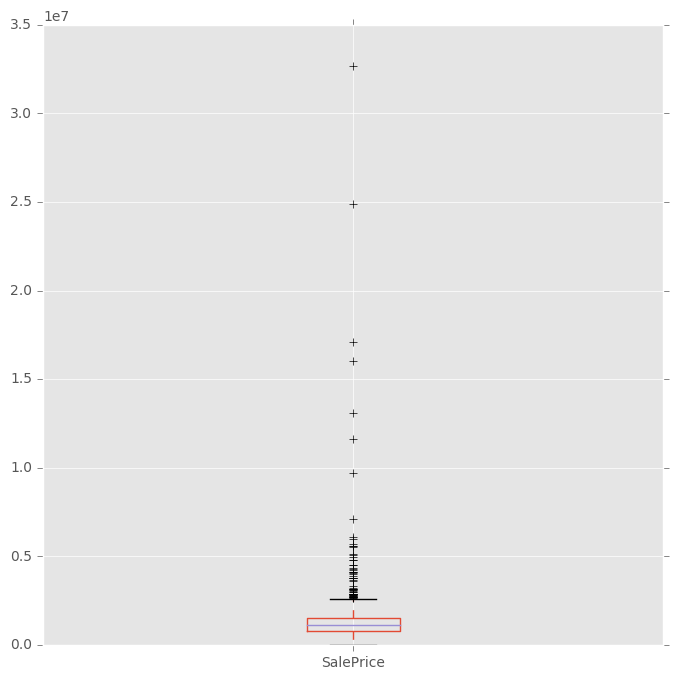

In [78]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

In [ ]:
df[['SalePrice']].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

In [ ]:
# TODO

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

In [ ]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

In [ ]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

In [ ]:
# TODO

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [ ]:
df.mode()

In [ ]:
df.Address.mode()

In [ ]:
df.Baths.mode()

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [ ]:
df[df.Address == '1 Mono St # B, San Francisco, CA']

In [ ]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

In [ ]:
df[df.Address == '1915 Diamond St, San Francisco, CA']

In [ ]:
df[df.Address == '1954 Golden Gate Ave, San Francisco, CA']

In [ ]:
df[df.Address == '2299 Market St APT 502, San Francisco, CA']

In [ ]:
df[df.Address == '643 Natoma St, San Francisco, CA']

In [ ]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

All duplicate entries...

In [ ]:
df[df.DateOfSale == '11/20/15']

In [ ]:
df[df.DateOfSale == '11/20/15'].shape[0]

In [ ]:
(df.DateOfSale == '11/20/15').sum()

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [ ]:
df.corr()

In [ ]:
df.Beds.corr(df.Baths)

### Heatmaps

In [ ]:
corr = df.corr()

corr

In [ ]:
# TODO

Let's pretty this up.

In [ ]:
list(corr.columns)

In [ ]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

In [ ]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

In [ ]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Scatter matrices

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [ ]:

# TODO

for beds in sorted (df.Beds.unique()):
    subdf = df[df.Beds == beds]
    print beds, '->'

In [ ]:
df.Beds.value_counts(dropna = )

> Careful on checking for `NaN` values!

In [90]:
# TODO

pd.crosstab(df.Baths, df.Beds)

Beds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Baths,,,,,,,,,
1.00,116,133,39,1,0,0,0,0,0
1.10,1,0,0,0,0,0,0,0,0
1.25,0,0,1,0,0,0,0,0,0
1.50,7,19,9,1,1,0,0,0,0
1.75,0,0,1,0,0,0,0,0,0
2.00,17,140,103,21,3,1,0,1,0
2.25,0,0,1,0,0,0,0,0,0
2.50,0,11,22,9,1,0,0,0,0
3.00,0,8,36,38,8,2,1,0,1


> #### Activity: Create a frequency table for `Baths` over `Beds`

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [ ]:
# TODO

df.BuiltInYear.map()